In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

# Load datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

C:\Users\dniva\AppData\Local\Temp\ipykernel_1640\651248848.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


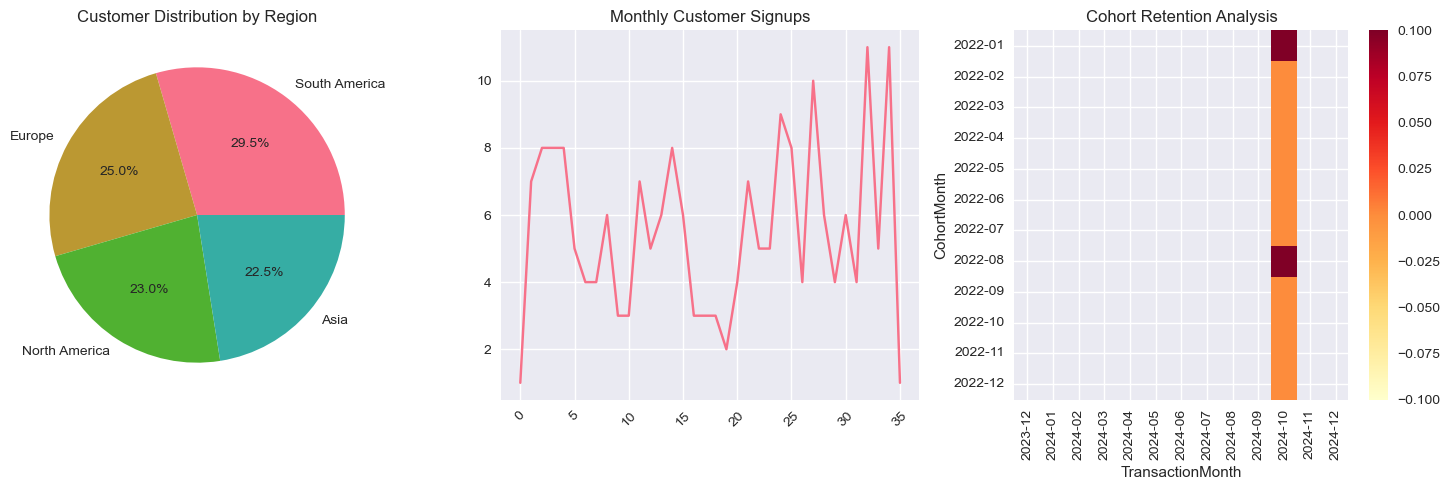

In [10]:
# 1. Customer Analysis
def analyze_customer_base():
    plt.figure(figsize=(15, 5))
    
    # Regional distribution
    plt.subplot(1, 3, 1)
    region_dist = customers_df['Region'].value_counts()
    plt.pie(region_dist.values, labels=region_dist.index, autopct='%1.1f%%')
    plt.title('Customer Distribution by Region')
    
    # Customer signup trends by month
    plt.subplot(1, 3, 2)
    customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')
    monthly_signups = customers_df.groupby('SignupMonth').size()
    plt.plot(range(len(monthly_signups)), monthly_signups.values)
    plt.title('Monthly Customer Signups')
    plt.xticks(rotation=45)
    
    # Customer cohort retention analysis
    plt.subplot(1, 3, 3)
    customers_df['CohortMonth'] = customers_df['SignupDate'].dt.to_period('M')
    transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
    
    cohort_data = pd.crosstab(
        customers_df['CohortMonth'],
        transactions_df['TransactionMonth']
    ).apply(lambda x: x/x.iloc[0])
    
    sns.heatmap(cohort_data.head(12), cmap='YlOrRd')
    plt.title('Cohort Retention Analysis')
    plt.tight_layout()
    plt.show()
analyze_customer_base()


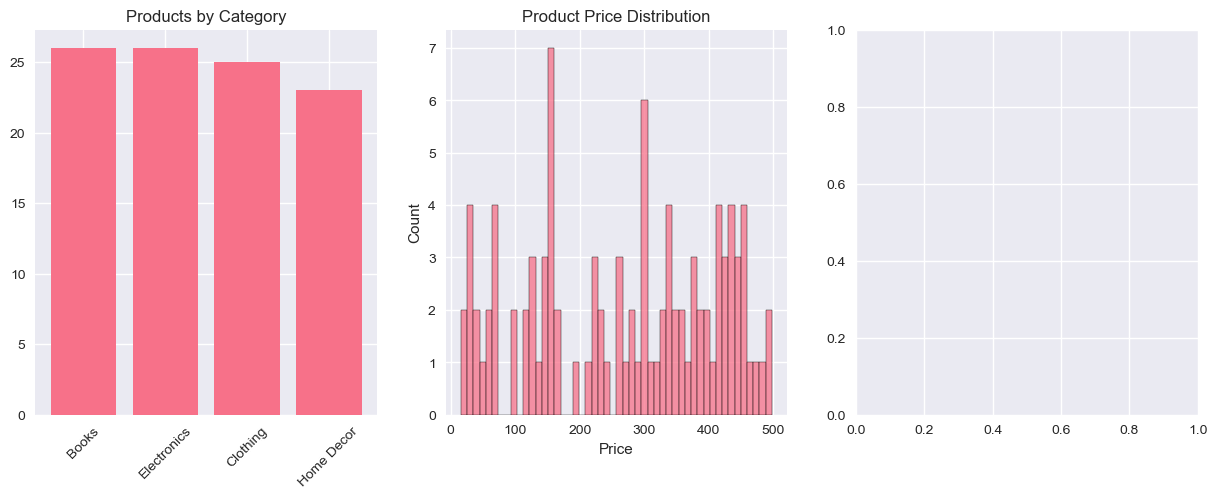

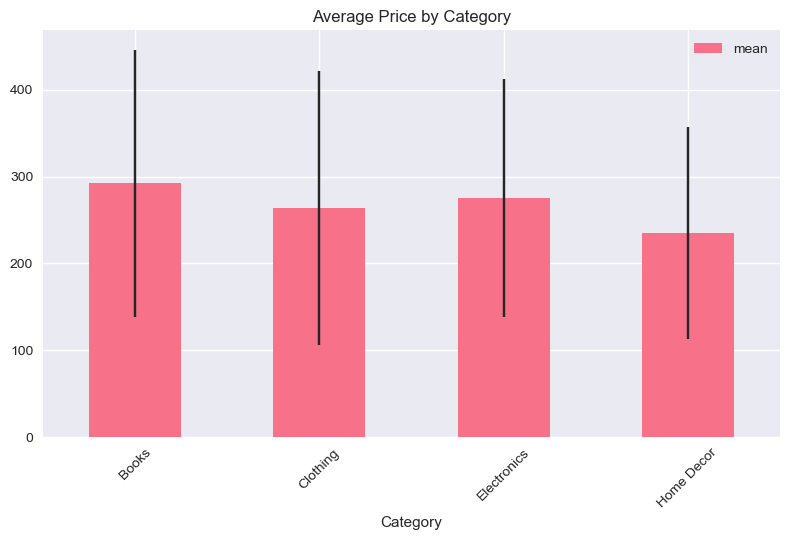

In [12]:
# 2. Product Analysis
def analyze_products():
    plt.figure(figsize=(15, 5))
    
    # Category distribution
    plt.subplot(1, 3, 1)
    category_dist = products_df['Category'].value_counts()
    plt.bar(category_dist.index, category_dist.values)
    plt.title('Products by Category')
    plt.xticks(rotation=45)
    
    # Price distribution
    plt.subplot(1, 3, 2)
    sns.histplot(products_df['Price'], bins=50)
    plt.title('Product Price Distribution')
    
    # Category price analysis
    plt.subplot(1, 3, 3)
    category_prices = products_df.groupby('Category')['Price'].agg(['mean', 'std'])
    category_prices.plot(kind='bar', yerr='std')
    plt.title('Average Price by Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
analyze_products()

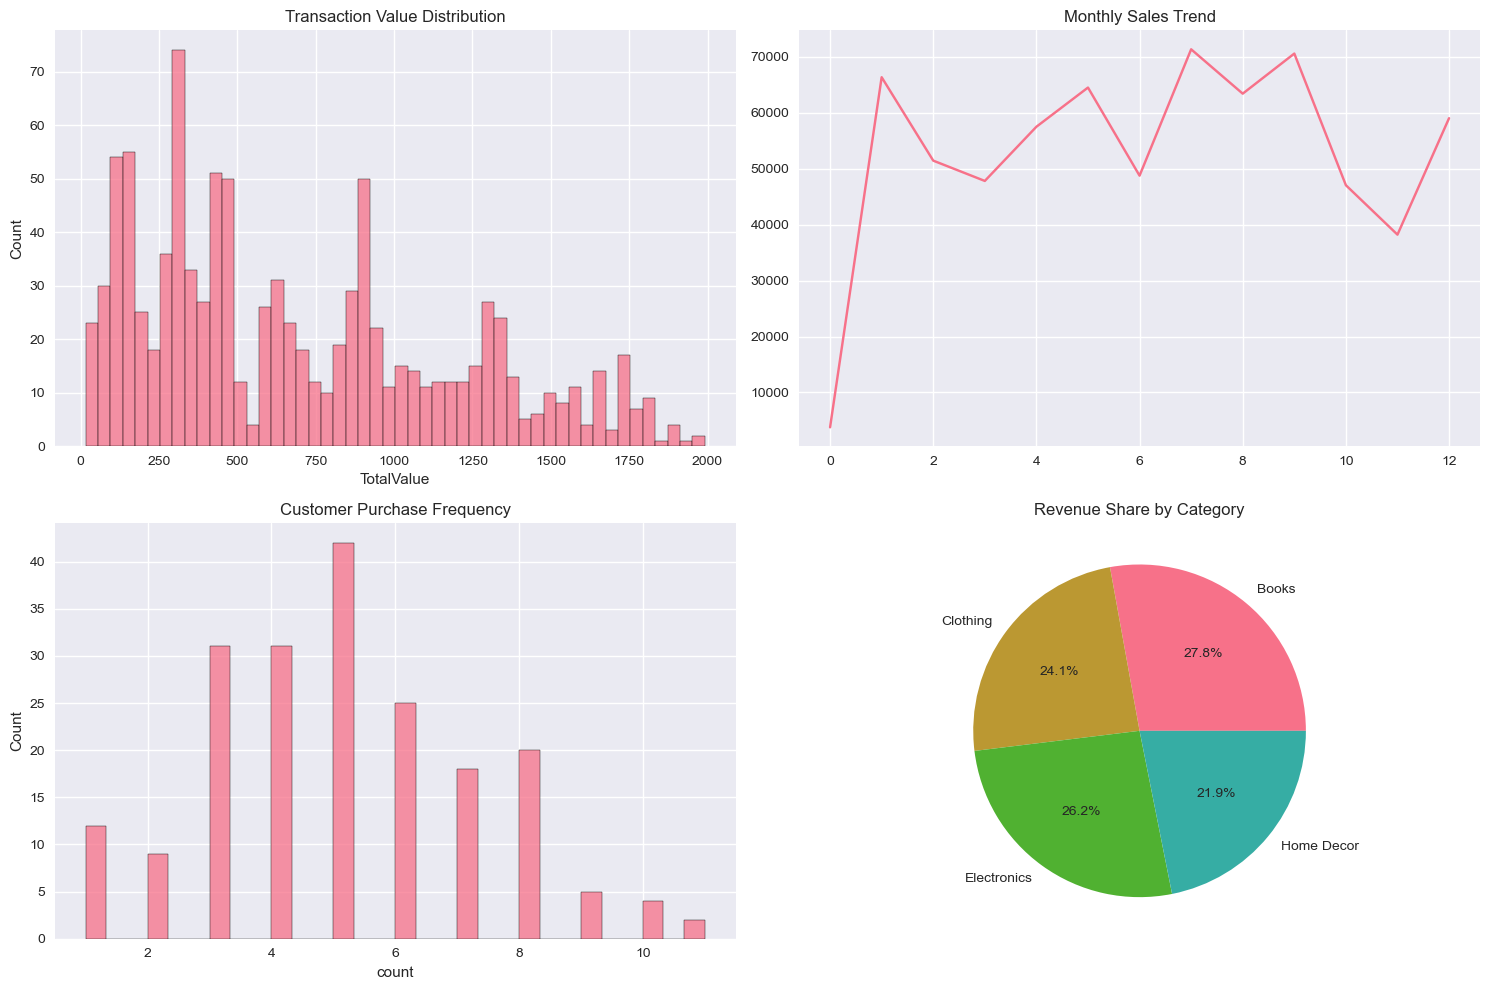

In [13]:
# 3. Transaction Analysis
def analyze_transactions():
    plt.figure(figsize=(15, 10))
    
    # Transaction value distribution
    plt.subplot(2, 2, 1)
    sns.histplot(transactions_df['TotalValue'], bins=50)
    plt.title('Transaction Value Distribution')
    
    # Monthly sales trend
    plt.subplot(2, 2, 2)
    monthly_sales = transactions_df.groupby(
        transactions_df['TransactionDate'].dt.to_period('M')
    )['TotalValue'].sum()
    plt.plot(range(len(monthly_sales)), monthly_sales.values)
    plt.title('Monthly Sales Trend')
    
    # Customer purchase frequency
    plt.subplot(2, 2, 3)
    purchase_freq = transactions_df['CustomerID'].value_counts()
    sns.histplot(purchase_freq, bins=30)
    plt.title('Customer Purchase Frequency')
    
    # Category revenue share
    plt.subplot(2, 2, 4)
    category_sales = transactions_df.merge(
        products_df[['ProductID', 'Category']], 
        on='ProductID'
    ).groupby('Category')['TotalValue'].sum()
    
    plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%')
    plt.title('Revenue Share by Category')
    plt.tight_layout()
    plt.show()
analyze_transactions()

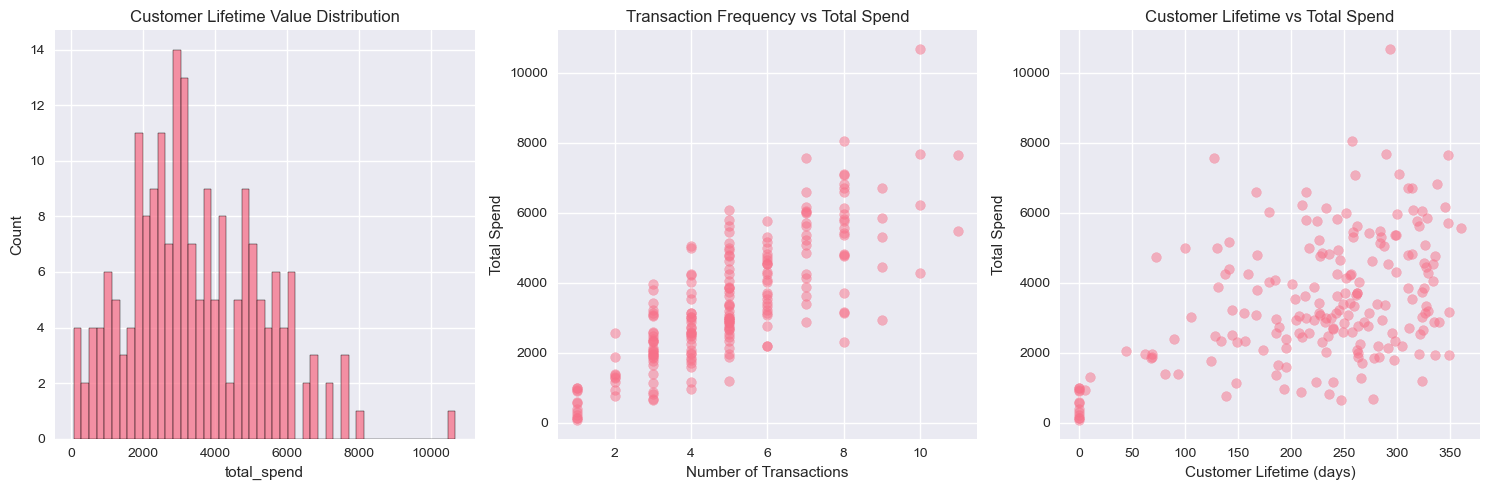

In [14]:
# 4. Customer Value Analysis
def analyze_customer_value():
    # Calculate customer lifetime value
    customer_value = transactions_df.groupby('CustomerID').agg({
        'TotalValue': 'sum',
        'TransactionID': 'count',
        'TransactionDate': ['min', 'max']
    })
    
    customer_value.columns = ['total_spend', 'transaction_count', 'first_purchase', 'last_purchase']
    customer_value['customer_lifetime'] = (
        customer_value['last_purchase'] - customer_value['first_purchase']
    ).dt.days
    
    plt.figure(figsize=(15, 5))
    
    # Customer lifetime value distribution
    plt.subplot(1, 3, 1)
    sns.histplot(customer_value['total_spend'], bins=50)
    plt.title('Customer Lifetime Value Distribution')
    
    # Transaction frequency vs Total spend
    plt.subplot(1, 3, 2)
    plt.scatter(
        customer_value['transaction_count'],
        customer_value['total_spend'],
        alpha=0.5
    )
    plt.xlabel('Number of Transactions')
    plt.ylabel('Total Spend')
    plt.title('Transaction Frequency vs Total Spend')
    
    # Customer lifetime vs Total spend
    plt.subplot(1, 3, 3)
    plt.scatter(
        customer_value['customer_lifetime'],
        customer_value['total_spend'],
        alpha=0.5
    )
    plt.xlabel('Customer Lifetime (days)')
    plt.ylabel('Total Spend')
    plt.title('Customer Lifetime vs Total Spend')
    plt.tight_layout()
    plt.show()
analyze_customer_value()

In [15]:
# Calculate key metrics
def calculate_key_metrics():
    metrics = {
        'Total Customers': len(customers_df),
        'Total Products': len(products_df),
        'Total Transactions': len(transactions_df),
        'Total Revenue': transactions_df['TotalValue'].sum(),
        'Average Transaction Value': transactions_df['TotalValue'].mean(),
        'Average Customer Lifetime Value': transactions_df.groupby('CustomerID')['TotalValue'].sum().mean()
    }
    return pd.Series(metrics)

print("\nKey Business Metrics:")
print(calculate_key_metrics())


Key Business Metrics:
Total Customers                       200.000000
Total Products                        100.000000
Total Transactions                   1000.000000
Total Revenue                      689995.560000
Average Transaction Value             689.995560
Average Customer Lifetime Value      3467.314372
dtype: float64


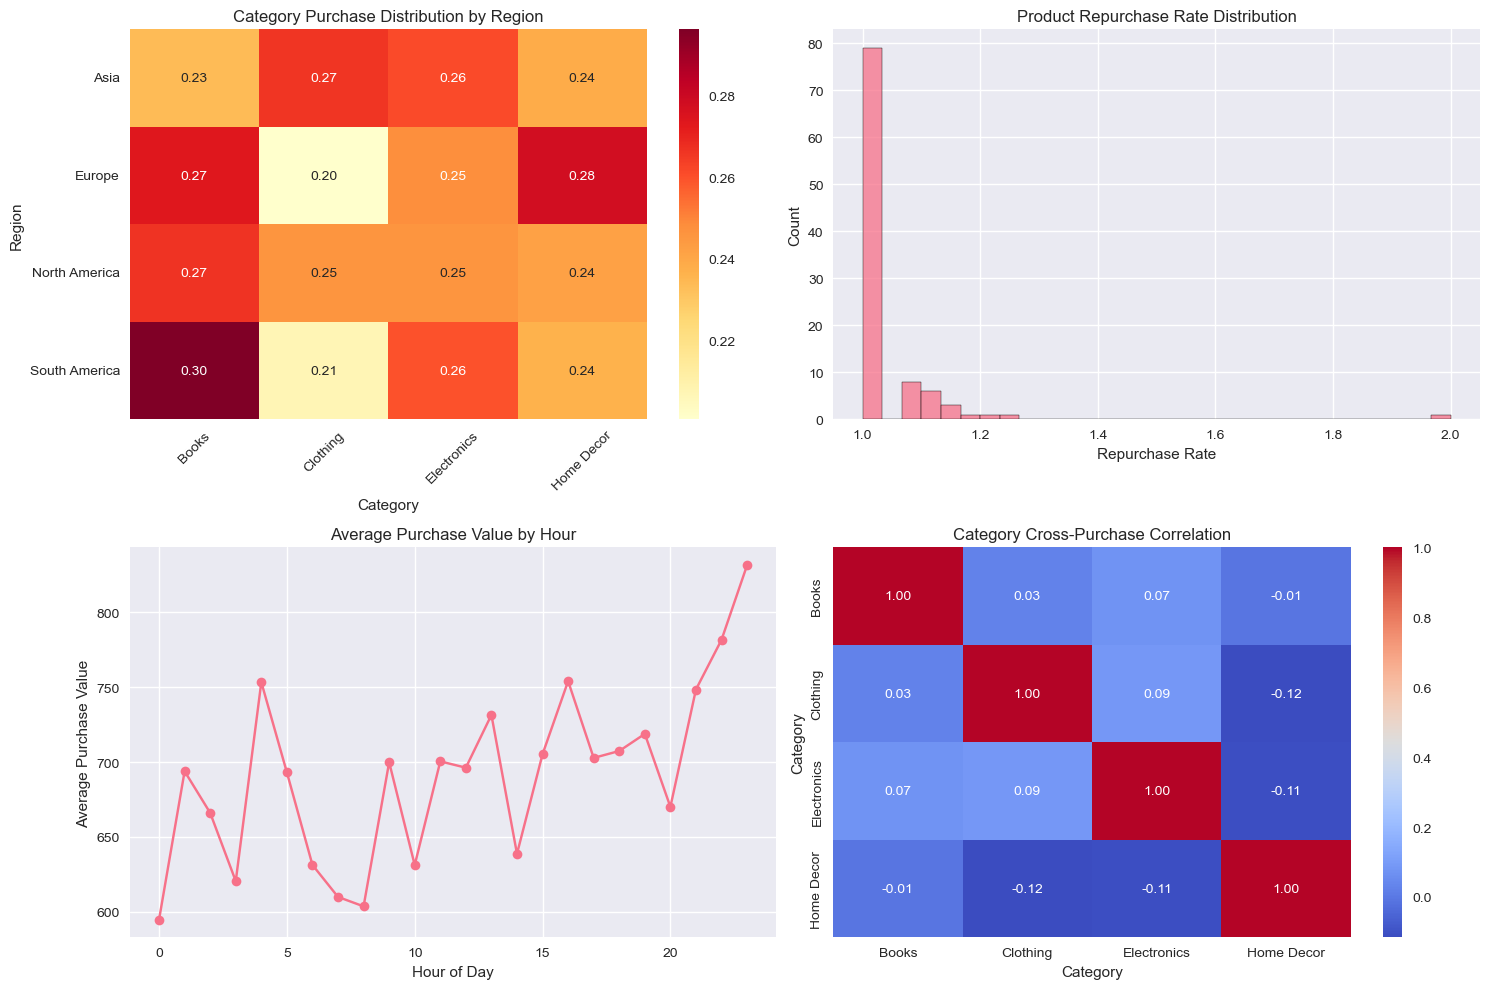


Customer-Product Interaction Metrics:
Average Products per Customer: 5.03
Category Cross-Purchase Rate: 93.97
Product Repurchase Rate: 100.00
Peak Shopping Hour: 23.00
Peak Shopping Value: 831.46


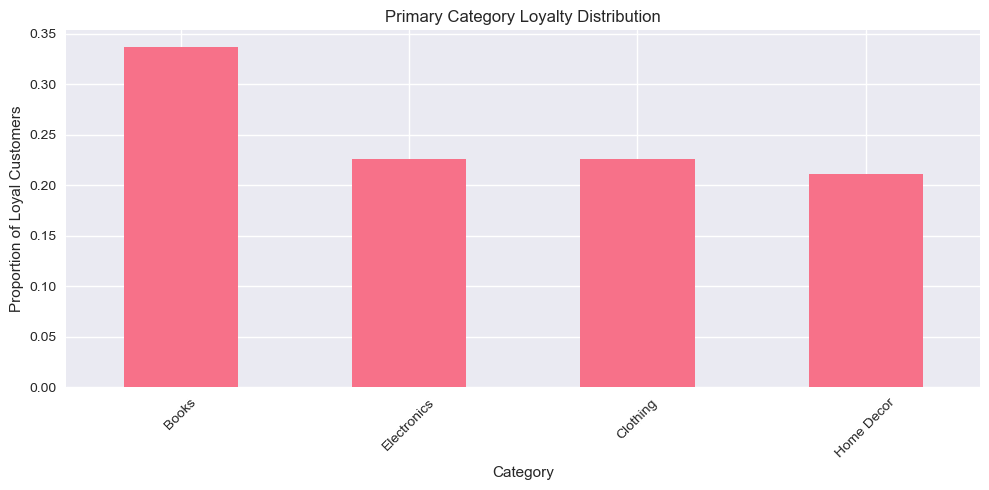

In [9]:
# 5. Customer-Product Interaction Analysis
def analyze_customer_product_interactions():
    # Merge transactions with products data
    purchase_data = transactions_df.merge(
        products_df[['ProductID', 'Category', 'Price']], 
        on='ProductID'
    )
    
    plt.figure(figsize=(15, 10))
    
    # 1. Category Purchase Frequency by Region
    plt.subplot(2, 2, 1)
    category_region = purchase_data.merge(
        customers_df[['CustomerID', 'Region']], 
        on='CustomerID'
    )
    
    pivot_data = pd.crosstab(
        category_region['Region'], 
        category_region['Category'], 
        normalize='index'
    )
    
    sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.2f')
    plt.title('Category Purchase Distribution by Region')
    plt.xticks(rotation=45)
    
    # 2. Product Repurchase Rate
    plt.subplot(2, 2, 2)
    product_frequency = purchase_data.groupby('ProductID')['CustomerID'].nunique()
    repeat_purchase_rate = (product_frequency > 1).mean() * 100
    
    product_repurchase = purchase_data.groupby('ProductID').agg({
        'CustomerID': 'nunique',
        'TransactionID': 'count'
    })
    product_repurchase['repurchase_rate'] = (
        product_repurchase['TransactionID'] / product_repurchase['CustomerID']
    )
    
    sns.histplot(product_repurchase['repurchase_rate'], bins=30)
    plt.title('Product Repurchase Rate Distribution')
    plt.xlabel('Repurchase Rate')
    
    # 3. Purchase Time Analysis
    plt.subplot(2, 2, 3)
    purchase_data['hour'] = purchase_data['TransactionDate'].dt.hour
    hourly_sales = purchase_data.groupby('hour')['TotalValue'].mean()
    
    plt.plot(hourly_sales.index, hourly_sales.values, marker='o')
    plt.title('Average Purchase Value by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Purchase Value')
    
    # 4. Category Cross-Purchase Analysis
    plt.subplot(2, 2, 4)
    customer_categories = pd.crosstab(
        purchase_data['CustomerID'],
        purchase_data['Category']
    )
    category_correlation = customer_categories.corr()
    
    sns.heatmap(category_correlation, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Category Cross-Purchase Correlation')
    plt.tight_layout()
    plt.show()
    
    # Additional metrics
    metrics = {
        'Average Products per Customer': len(purchase_data) / purchase_data['CustomerID'].nunique(),
        'Category Cross-Purchase Rate': (customer_categories.sum(axis=1) > 1).mean() * 100,
        'Product Repurchase Rate': repeat_purchase_rate,
        'Peak Shopping Hour': hourly_sales.idxmax(),
        'Peak Shopping Value': hourly_sales.max()
    }
    
    print("\nCustomer-Product Interaction Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    
    # Calculate category loyalty
    category_loyalty = purchase_data.groupby('CustomerID')['Category'].agg(lambda x: x.mode()[0])
    category_loyalty_dist = category_loyalty.value_counts(normalize=True)
    
    plt.figure(figsize=(10, 5))
    category_loyalty_dist.plot(kind='bar')
    plt.title('Primary Category Loyalty Distribution')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Loyal Customers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

analyze_customer_product_interactions()

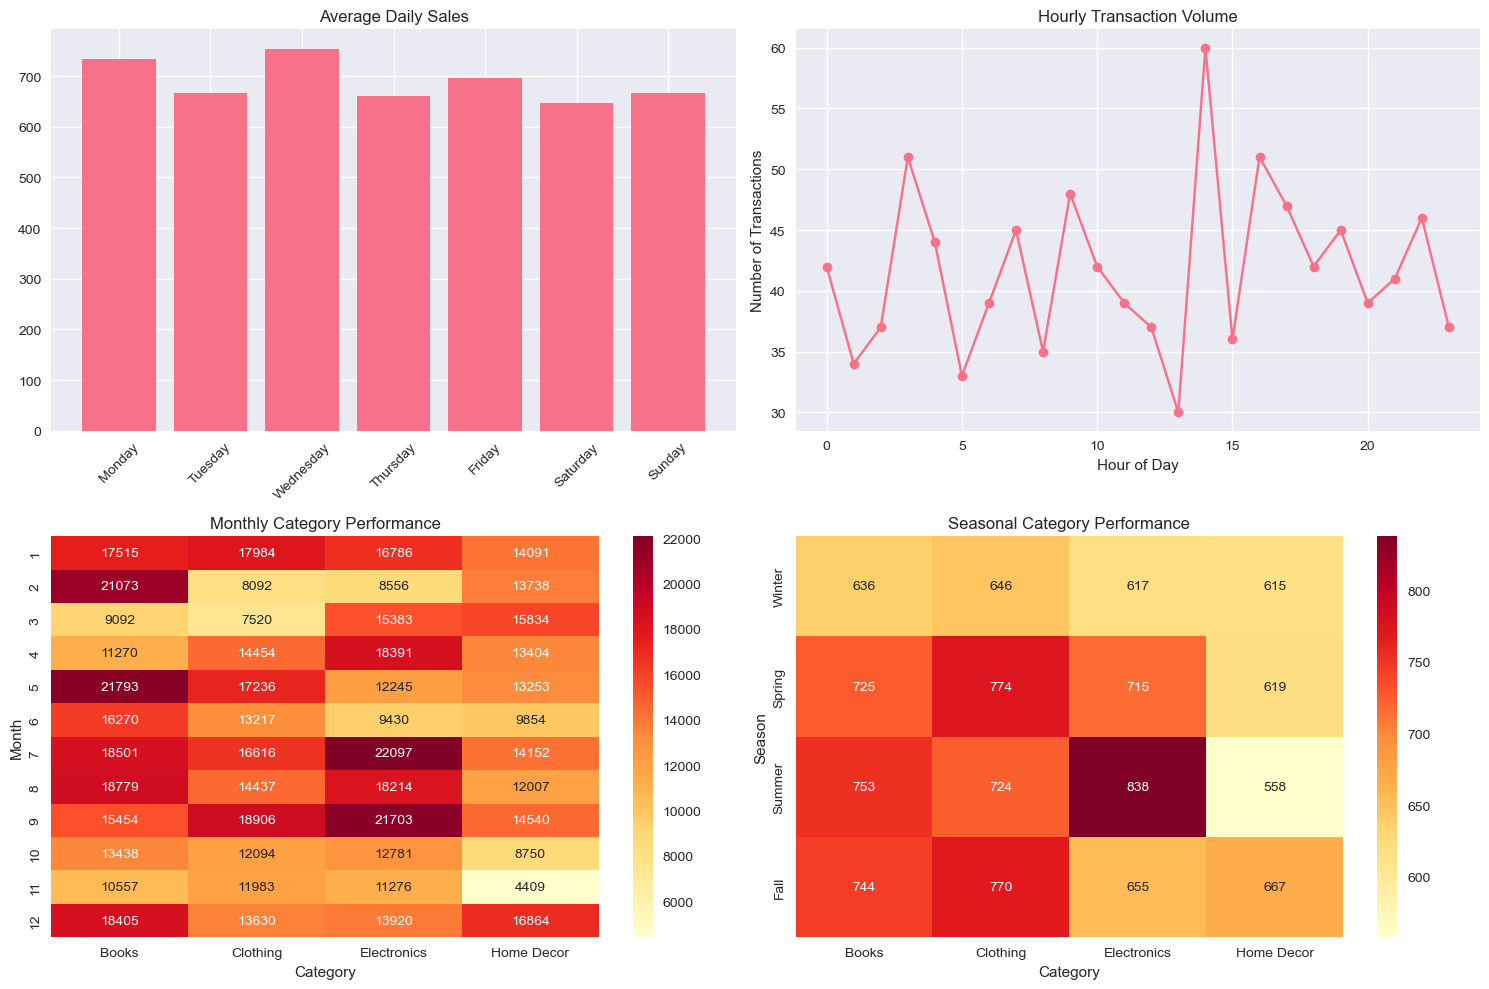


Temporal Analysis Metrics:
Peak Sales Day: Wednesday
Peak Sales Hour: 14
Best Performing Season: Summer
Daily Sales Variation: 0.05920949041871964
Hourly Sales Variation: 0.16287845561751815


In [11]:
# 6. Time-Based Performance Analysis
def analyze_temporal_patterns():
    plt.figure(figsize=(15, 10))
    
    # Daily sales patterns
    plt.subplot(2, 2, 1)
    transactions_df['DayOfWeek'] = transactions_df['TransactionDate'].dt.day_name()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_sales = transactions_df.groupby('DayOfWeek')['TotalValue'].mean()
    daily_sales = daily_sales.reindex(day_order)
    
    plt.bar(daily_sales.index, daily_sales.values)
    plt.title('Average Daily Sales')
    plt.xticks(rotation=45)
    
    # Hourly transaction patterns
    plt.subplot(2, 2, 2)
    transactions_df['Hour'] = transactions_df['TransactionDate'].dt.hour
    hourly_transactions = transactions_df.groupby('Hour').size()
    
    plt.plot(hourly_transactions.index, hourly_transactions.values, marker='o')
    plt.title('Hourly Transaction Volume')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Transactions')
    
    # Monthly category performance
    plt.subplot(2, 2, 3)
    transactions_df['Month'] = transactions_df['TransactionDate'].dt.month
    category_monthly = transactions_df.merge(
        products_df[['ProductID', 'Category']], 
        on='ProductID'
    ).pivot_table(
        index='Month',
        columns='Category',
        values='TotalValue',
        aggfunc='sum'
    )
    
    sns.heatmap(category_monthly, cmap='YlOrRd', annot=True, fmt='.0f')
    plt.title('Monthly Category Performance')
    
    # Seasonal trend analysis
    plt.subplot(2, 2, 4)
    transactions_df['Season'] = pd.cut(
        transactions_df['TransactionDate'].dt.month,
        bins=[0, 3, 6, 9, 12],
        labels=['Winter', 'Spring', 'Summer', 'Fall']
    )
    
    seasonal_category = transactions_df.merge(
        products_df[['ProductID', 'Category']], 
        on='ProductID'
    ).pivot_table(
        index='Season',
        columns='Category',
        values='TotalValue',
        aggfunc='mean'
    )
    
    sns.heatmap(seasonal_category, cmap='YlOrRd', annot=True, fmt='.0f')
    plt.title('Seasonal Category Performance')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate additional temporal metrics
    temporal_metrics = {
        'Peak Sales Day': daily_sales.idxmax(),
        'Peak Sales Hour': hourly_transactions.idxmax(),
        'Best Performing Season': seasonal_category.mean(axis=1).idxmax(),
        'Daily Sales Variation': daily_sales.std() / daily_sales.mean(),
        'Hourly Sales Variation': hourly_transactions.std() / hourly_transactions.mean()
    }
    
    print("\nTemporal Analysis Metrics:")
    for metric, value in temporal_metrics.items():
        print(f"{metric}: {value}")

analyze_temporal_patterns()